In [1]:
import yfinance as yf 
from make_data import make_data

SP500 = yf.download('SPY', keepna = True )
data = make_data(SP500)

data.to_csv('example.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
!python DWT.py

Figure(640x480)
check the example.png created by this file


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA7,SMA14,SMA30,...,ForceIndex14,ForceIndex30,ForceIndex60,ForceIndex90,EMV5,EMV7,EMV14,EMV30,EMV60,EMV90
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218210,1003200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397594,480500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451406,201300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720442,529400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828054,531500,25.523141,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,399.739990,401.480011,390.529999,391.559998,391.559998,111945300,399.482001,398.565713,398.991431,404.728001,...,-1.871726e+09,-9.840001e+08,8.697898e+06,1.490764e+09,-1.383076,-1.751930,-4.712134,1.647143,2.037583,1.940796
2023-03-10,390.989990,393.160004,384.320007,385.910004,385.910004,189105300,395.826001,397.304286,397.466431,404.100001,...,-4.037399e+09,-3.562743e+09,-2.121081e+09,-2.518422e+08,-15.675859,-5.332561,-5.824101,-0.690141,1.374214,1.298024
2023-03-13,381.809998,390.390015,380.649994,385.359985,385.359985,157790000,392.003998,395.525713,396.485716,403.422667,...,-2.166458e+09,-3.206294e+09,-2.330971e+09,1.444370e+08,-23.422117,-8.678999,-5.264157,-2.118102,-0.279429,0.996661


## Test CWT

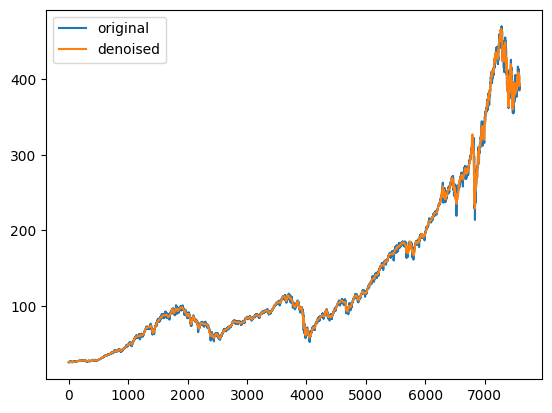

check the example.png created by this file


In [4]:
from CWT import CWT
from DWT import discrete_wavelet_denoise, log_return

In [5]:
k = 30
sample =  data['Adj Close'][:k].to_numpy()
sample_denoised = discrete_wavelet_denoise (sample , wavelet = 'db4', level = 1)
log_ret = log_return(sample_denoised)

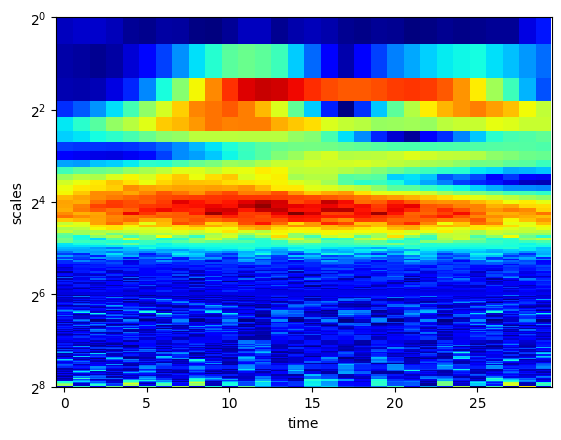

array([[0.00019964, 0.00037115, 0.00030263, ..., 0.00075835, 0.00057454,
        0.00016932],
       [0.00042132, 0.0005249 , 0.00052523, ..., 0.00018261, 0.00066266,
        0.00108986],
       [0.00028791, 0.00023053, 0.00015885, ..., 0.00228445, 0.00200557,
        0.00168625],
       ...,
       [0.00392354, 0.00055835, 0.00294024, ..., 0.00443989, 0.00035848,
        0.00294202],
       [0.00393126, 0.00055945, 0.00294603, ..., 0.00444862, 0.00035919,
        0.00294781],
       [0.00056055, 0.0029518 , 0.00083036, ..., 0.00036169, 0.00480239,
        0.00056322]])

In [9]:
import os 
kwargs = {'b' : 2., 'c' : 1. }
CWT (log_ret,show = True, wavelet = 'cmor',path= 'scalo.png', **kwargs  )

##  Generation de NN datasets

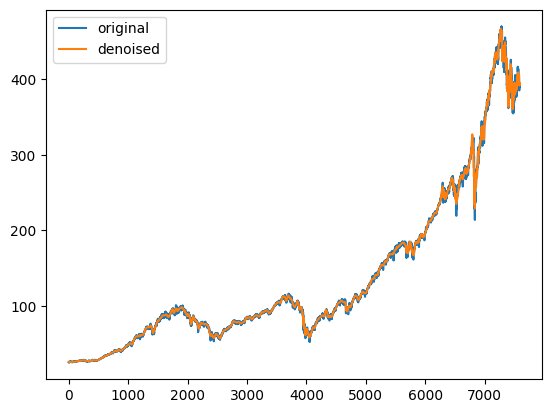

check the example.png created by this file


In [3]:
from pipeline import *

In [ ]:
window_size = 360
level_discrete_wavelet_transform = 1
kwargs = {'b' : 2., 'c' : 1. }
signal = data['Adj Close'].to_numpy()
generate_NN_dataset(
    signal ,
    window_size,
    method_labels = 'mean',
    level_discrete_wavelet_transform = 2,
    discrete_wavelet = 'db4',
    continuous_wavelet = 'cmor',
    **kwargs 
    )

  0%|▎                                                                             | 32/7228 [01:07<4:14:26,  2.12s/it]

KeyboardInterrupt

